#**Decision tree (決策樹)**
決策樹就是一個解釋性能力很強的模型

分兩組的蘑菇決策樹 : https://tree.rocks/decision-tree-graphviz-contour-with-pandas-gen-train-test-dataset-for-beginner-9137b7c8416a

分三組的披薩決策樹 : https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda

# 蘑菇

## data 準備

In [1]:
import os
os.chdir('/Users/jeffery/Github/machine_learning_project/decisiion tree/')

In [2]:
import random
from collections import defaultdict
mushrooms = defaultdict(lambda: [])
def checkType(size, length):
    if size < 10: return 'Amushroom'
    if size < 15: return 'Bmushroom'
    if length > 15:
        return 'Amushroom'
    return 'Cmushroom'
for i in range(100):
    size = random.randint(1, 20)
    length = random.randint(1, 20)
    mushrooms['type'].append(checkType(size, length))
    mushrooms['size'].append(size)
    mushrooms['length'].append(length)

In [3]:
import pandas as pd
data = pd.DataFrame.from_dict(mushrooms)
data

,type,size,length
0,Cmushroom,15,10
1,Amushroom,3,9
2,Amushroom,2,18
3,Bmushroom,13,17
4,Amushroom,4,4
...,...,...,...
95,Amushroom,2,16
96,Bmushroom,10,20
97,Bmushroom,13,20
98,Bmushroom,12,8


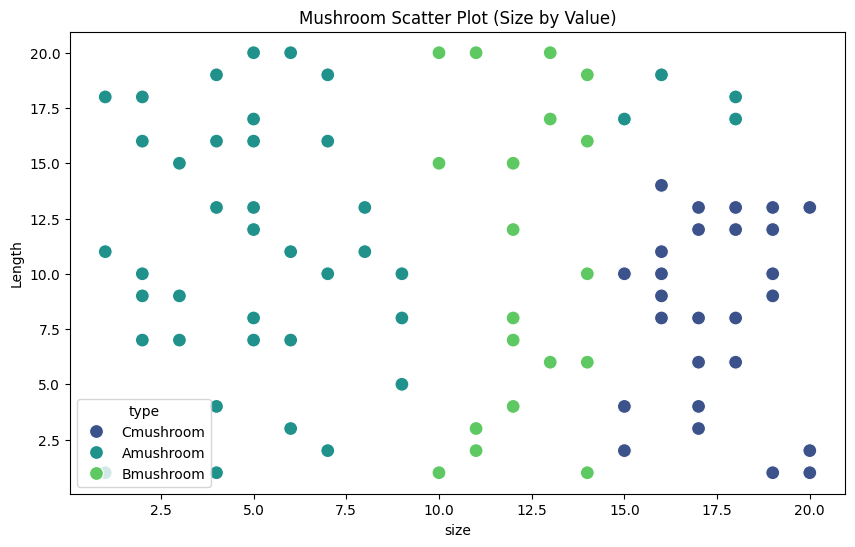

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='size', y='length', hue='type', palette='viridis', s=100)
plt.xlabel('size')
plt.ylabel('Length')
plt.title('Mushroom Scatter Plot (Size by Value)')
plt.show()

In [4]:
y = data['type']                   # 變出 y 資料
X = data.drop(['type'], axis=1)    # 變出 X 資料，將 type 丟棄
print(X,y)

    size  length
0     15      10
1      3       9
2      2      18
3     13      17
4      4       4
..   ...     ...
95     2      16
96    10      20
97    13      20
98    12       8
99     9       5

[100 rows x 2 columns] 0     Cmushroom
1     Amushroom
2     Amushroom
3     Bmushroom
4     Amushroom
        ...    
95    Amushroom
96    Bmushroom
97    Bmushroom
98    Bmushroom
99    Amushroom
Name: type, Length: 100, dtype: object


## training

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 看training的acc

In [30]:
model.score(X_test, y_test)

1.0

In [31]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

1.0

## 看test的acc

In [32]:
from sklearn.metrics import accuracy_score
answers =  []    # 存放真正答案
predicts = []    # 存放預測結果
for i in range(100):
    size = random.randint(1, 20)
    length = random.randint(1, 20)
    answers.append(checkType(size, length))
    predicts.append(model.predict([[size, length]]))
accuracy_score(answers, predicts)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

1.0

## 畫圖

In [33]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='mushrooms.dot',
                feature_names=['size', 'length'],
                class_names=model.classes_)

In [34]:
os.system("dot -Tpng 'mushrooms.dot' -o 'mushrooms.png'") #decision過程 #先處理size再分lenght

0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'length')

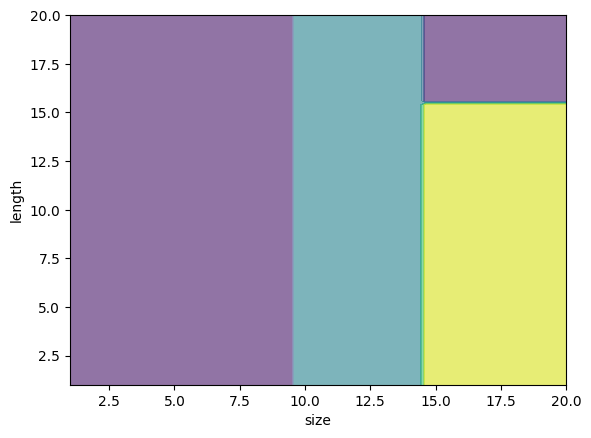

In [36]:
import matplotlib.pyplot as plt
import numpy as np

resolution = 100
dx = np.linspace(np.min(1), np.max(20), resolution)
dy = np.linspace(np.min(1), np.max(20), resolution)
dx, dy = np.meshgrid(dx, dy)
Xc = np.c_[dx.flatten(), dy.flatten()]
z = model.predict(Xc)
# convert predict to number
kls = list(model.classes_)
z = np.array([kls.index(v) for v in z])
z = z.reshape(dx.shape)
plt.contourf(dx, dy, z, alpha=0.6)
plt.xlabel('size')
plt.ylabel('length')       #資料分佈情況

## 結論

tree base騎士就是一直做資料分割到完全符合那個類別，可是會因為只有一棵樹造成overfitting，所以才有隨機森林的部分，每次train都擋住一部分資料，然後最後投票(bagging)，還有另一種是一直修至前一棵樹(boosting)像是XGboost